# Take-Home Assignment



## Setup

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_colwidth", 120)

hyper = pd.read_csv("Polymarket data-interview - Hyperparameters.csv")
full = pd.read_csv("Polymarket data-interview - Full Markets.csv")
vol = pd.read_csv("Polymarket data-interview - Volatility Markets.csv")
allm = pd.read_csv("Polymarket data-interview - All Markets.csv")

full.head()


,question,answer1,answer2,neg_risk,spread,best_bid,best_ask,rewards_daily_rate,bid_reward_per_100,ask_reward_per_100,gm_reward_per_100,sm_reward_per_100,min_size,max_spread,tick_size,market_slug,token1,token2,condition_id
0,Will Trump sign the Epstein Disclosure Bill on November 19?,Yes,No,True,0.010,0.480,0.490,1200,165.06,85.60,118.87,125.33,200,4.5,0.010,will-trump-sign-the-epstein-disclosure-bill-on-november-19,7304103206122338981036231252148418347223866287317995541443362309144858168476,55576471032399305381302238637319486628053926259786213533264346369033414565194,0x2e956c939e0bee2fc22ccea7f3122635ef6a829747a9c16207fcdd594c694dc9
1,Fed decreases interest rates by 25 bps after December 2025 meeting?,Yes,No,True,0.010,0.530,0.540,500,0.21,0.53,0.33,0.37,200,3.5,0.010,fed-decreases-interest-rates-by-25-bps-after-december-2025-meeting,87769991026114894163580777793845523168226980076553814689875238288185044414090,13411284055273560855537595688801764123705139415061660246624128667183605973730,0xcb111226a8271fed0c71bb5ec1bd67b2a4fd72f1eb08466e2180b9efa99d3f32
2,Will Trump sign the Epstein Disclosure Bill on November 20?,Yes,No,True,0.030,0.320,0.350,500,38.51,30.51,34.28,34.51,200,4.5,0.010,will-trump-sign-the-epstein-disclosure-bill-on-november-20,91468771724914882057968579450321215934958415924322181006716330623974140897720,68851424528003346770819109732503426551041516288141341404568941066215961321720,0x5ca7f7c40e5dbce4b00c5bd586f18445a3f8ef3efd7150a7e725e60df64d51ac
3,US x Venezuela military engagement by November 30?,Yes,No,False,0.010,0.110,0.120,300,2.27,29.17,8.14,15.72,200,3.5,0.010,us-x-venezuela-military-engagement-by-november-30-216-397-226-467-735-374-192-441,52495530769657433426315073623394145992266323233191674488787593449327803900186,52365552199401369443408259986324629171792690921627298943075194906042228248932,0xbea5d5174cb5355eaf0f8cee780e67d0b22a6ff614ef7ec82cc2fe6ce8f4b111
4,Will Trump sign the Epstein Disclosure Bill on November 24?,Yes,No,True,0.007,0.005,0.012,300,50.45,18.51,30.56,34.48,200,4.5,0.001,will-trump-sign-the-epstein-disclosure-bill-on-november-24,59742011069602199204176949665334728364748976004347369986827274134464283768198,6868086229967776395367896908184994239330341745018508670186300522717477755249,0x67b250aedf9602a985ff6f47124a558412c0ea00646115234d3d795399406277


## Part 1 – Core Data Analysis

### 1.1 Spread and Liquidity

We approximate the **bid–ask spread** of each market as:

\begin{equation}
\text{spread} = \text{best_ask} - \text{best_bid}
\end{equation}

Intuitively:
- Tighter spreads → more competition and liquidity, less edge per trade.
- Wider spreads → less competition and liquidity, but potentially higher edge (and higher risk).


Max absolute difference between provided spread and computed spread:
1.998

Three tightest-spread markets:


,market_slug,question,best_bid,best_ask,spread,computed_spread
736,will-keir-starmer-say-wales-during-the-next-prime-ministers-questions,"Will Keir Starmer say ""Wales"" during the next Prime Minister's Questions?",0.999,0.0,0.999,-0.999
691,will-bill-ackman-say-stupid-during-the-x-space-event-on-november-18-126,"Will Bill Ackman say ""Stupid"" during the X Space event on November 18?",0.999,0.0,0.999,-0.999
955,will-keir-starmer-say-cut-during-the-next-prime-ministers-questions,"Will Keir Starmer say ""Cut"" during the next Prime Minister's Questions?",0.999,0.0,0.999,-0.999



Three widest-spread markets:


,market_slug,question,best_bid,best_ask,spread,computed_spread
394,nya-up-or-down-on-november-19-2025,NYA (NYA) Up or Down on November 19?,0.010,0.99,0.980,0.980
2994,will-rose-byrne-be-nominated-for-best-actress-at-the-98th-academy-awards,Will Rose Byrne be nominated for Best Actress at the 98th Academy Awards?,0.020,0.99,0.970,0.970
872,will-keir-starmer-say-crypto-or-bitcoin-during-the-next-prime-ministers-questions,"Will Keir Starmer say ""Crypto"" or ""Bitcoin"" during the next Prime Minister's Questions?",0.001,0.94,0.939,0.939


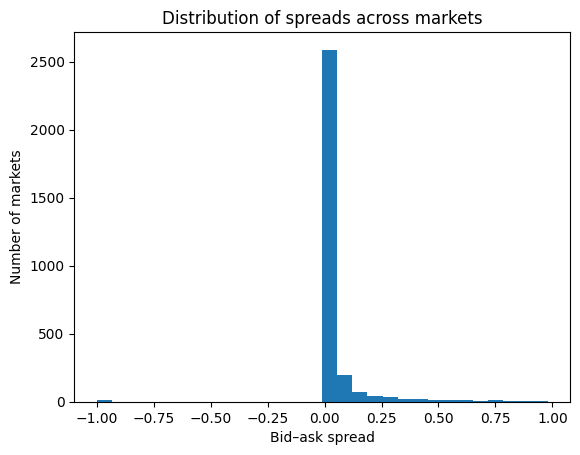

In [4]:

full_spreads = full.copy()
full_spreads["computed_spread"] = full_spreads["best_ask"] - full_spreads["best_bid"]
full_spreads["spread_diff"] = full_spreads["computed_spread"] - full_spreads["spread"]

print("Max absolute difference between provided spread and computed spread:")
print(full_spreads["spread_diff"].abs().max())

cols_show = ["market_slug", "question", "best_bid", "best_ask", "spread", "computed_spread"]

tightest = full_spreads.sort_values("computed_spread").head(3)[cols_show]
widest = full_spreads.sort_values("computed_spread", ascending=False).head(3)[cols_show]

print("\nThree tightest-spread markets:")
display(tightest)

print("\nThree widest-spread markets:")
display(widest)

plt.figure()
plt.hist(full_spreads["computed_spread"], bins=30)
plt.xlabel("Bid–ask spread")
plt.ylabel("Number of markets")
plt.title("Distribution of spreads across markets")
plt.show()


From this, we can see which markets are **highly liquid / competitive** (very tight spreads) and which are **not liquid / wide**. In practice:
- Tight spreads generally indicate many active market makers and takers, plus deeper order books.
- Wide spreads often appear where order flow is sparse, risk is high, or information is one-sided.
- As a market maker, we expect **lower per-trade edge** but **higher volume** in tight markets, and the opposite in wide markets.

### 1.2 Volatility

The `Volatility Markets` / `All Markets` sheets already provide realized volatility metrics at different horizons (`1_hour`, `3_hour`, `6_hour`, ...). We treat the `3_hour` column as a proxy for a **3-hour rolling volatility of the mid-price**.

Here we identify the most and least volatile markets by this metric, and look at how volatility relates to spreads.

Most volatile markets by 3h volatility:


,market_slug,question,3_hour,best_bid,best_ask,spread
805,will-keir-starmer-say-mr-speaker-30-times-during-the-next-prime-ministers-questions,"Will Keir Starmer say ""Mr. Speaker"" 30+ times during the next Prime Minister's Questions?",285.41,0.001,0.040,0.039
643,will-lot-13-ernst-ludwig-kirchners-frnzi-mit-pfeilbogen-sell-for-3m-or-more-441-487-419,Will Lot 13 Ernst Ludwig Kirchner’s “Fränzi mit Pfeilbogen” sell for 3m or more?,268.26,0.011,0.034,0.023
779,timothe-chalame-and-kylie-jenner-engaged-in-2025,Timothée Chalamet and Kylie Jenner engaged in 2025?,263.23,0.050,0.230,0.180
828,will-keir-starmer-say-gentleman-or-lady-6-times-during-the-next-prime-ministers-questions,"Will Keir Starmer say ""Gentleman"" or ""Lady"" 6+ times during the next Prime Minister's Questions?",222.12,0.001,0.030,0.029
77,ranger-fdv-above-60m-one-day-after-launch,Ranger FDV above $60M one day after launch?,207.54,0.180,0.460,0.280



Least volatile markets by 3h volatility:


,market_slug,question,3_hour,best_bid,best_ask,spread
318,will-msft-close-between-510-and-520-week-november-21-2025,Will Microsoft (MSFT) close at $510-$520 on the final day of trading of the week of Nov 17 – Nov 21?,0.0,0.06,0.10,0.04
329,will-msft-close-between-530-and-540-week-november-21-2025,Will Microsoft (MSFT) close at $530-$540 on the final day of trading of the week of Nov 17 – Nov 21?,0.0,0.02,0.06,0.04
592,msft-above-470-on-november-21-2025,Will Microsoft (MSFT) finish week of November 17 above $470?,0.0,0.94,0.95,0.01
849,will-russia-capture-all-of-vovchansk-by-december-31,Will Russia capture all of Vovchansk by December 31?,0.0,0.26,0.28,0.02
847,will-jafar-panahi-be-nominated-for-best-director-at-the-98th-academy-awards,Will Jafar Panahi be nominated for Best Director at the 98th Academy Awards?,0.0,0.43,0.50,0.07


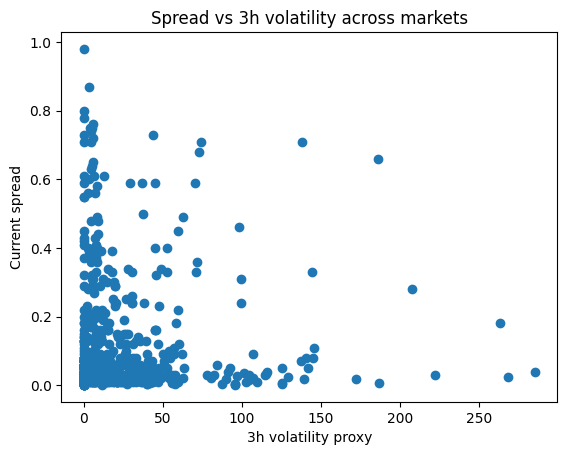

In [5]:

# We use the '3_hour' column in the "All Markets" sheet as a 3h volatility proxy
vol3 = allm[["market_slug", "question", "3_hour", "best_bid", "best_ask", "spread"]].copy()
vol3 = vol3.dropna(subset=["3_hour"])

most_volatile = vol3.sort_values("3_hour", ascending=False).head(5)
least_volatile = vol3.sort_values("3_hour").head(5)

print("Most volatile markets by 3h volatility:")
display(most_volatile)

print("\nLeast volatile markets by 3h volatility:")
display(least_volatile)

plt.figure()
plt.scatter(vol3["3_hour"], vol3["spread"])
plt.xlabel("3h volatility proxy")
plt.ylabel("Current spread")
plt.title("Spread vs 3h volatility across markets")
plt.show()


Note that:
- Higher volatility tends to **push spreads wider** because market makers face more price risk and adverse selection.
- In calmer markets, makers can safely quote tighter spreads since mid-prices move less between quote and fill.
- If we see a market with *both* high volatility *and* very tight spreads, it usually means intense competition or strong fee/reward incentives drawing in liquidity providers.

### 1.3 Flow and Drift

The provided google sheet are **aggregated snapshots**, so we do **not** observe individual taker trades or the raw `taker_buy` / `taker_sell` counts required to compute actual net taker flow.

Instead, we:
1. Explain how we'd compute this from tick data.
2. Build a small synthetic example to show how flow imbalance can correlate with short-term price drift.

If we had trade-level data, for each short time window we would compute:
\begin{align}
\text{net_taker_flow}_t &= \text{taker_buy}_t - \text{taker_sell}_t,\\
\text{drift}_t &= m_{t+\Delta} - m_t,
\end{align}
where $m_t$ is the mid-price. Then we'd look at the relationship between `net_taker_flow_t` and `drift_t` (e.g., regression or conditional averages).

Correlation between synthetic net flow and future price drift: 0.346


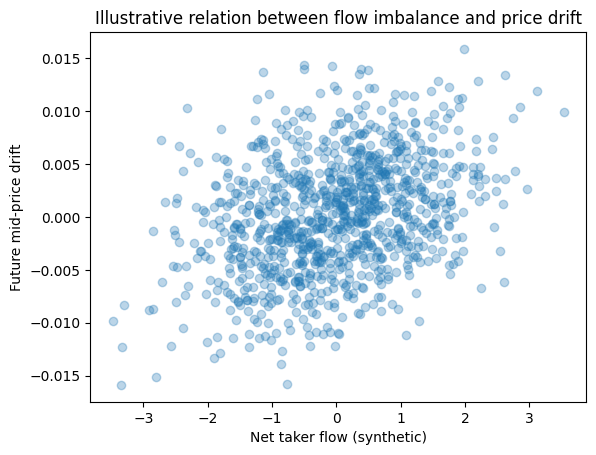

In [6]:

rng = np.random.default_rng(0)
n = 1000

#we simulate a mid-price path with a bounded random walk
mid = 0.5 + np.cumsum(rng.normal(scale=0.01, size=n))
mid = np.clip(mid, 0.01, 0.99)

#latent "information signal" driving both flow and future drift
signal = rng.normal(scale=1.0, size=n)

#net taker flow: noisy proxy for the signal
net_flow = signal + rng.normal(scale=0.5, size=n)

#future mid-prices that partially follow the signal
mid_next = np.clip(mid + 0.002 * signal + rng.normal(scale=0.005, size=n), 0.01, 0.99)
drift = mid_next - mid

corr = np.corrcoef(net_flow, drift)[0, 1]
print(f"Correlation between synthetic net flow and future price drift: {corr:.3f}")

plt.figure()
plt.scatter(net_flow, drift, alpha=0.3)
plt.xlabel("Net taker flow (synthetic)")
plt.ylabel("Future mid-price drift")
plt.title("Illustrative relation between flow imbalance and price drift")
plt.show()


In real data, we'd expect **persistent net buy flow** in a contract to be associated with upward price drift (and similarly for sell flow), especially when flow comes from informed traders.

For a market maker this matters because:
- Flow imbalance is a **signal about where the price wants to go**.
- Quoting symmetrically in the face of strong one-sided flow increases the risk of accumulating a large, adversely-selected inventory.
- Practical MMs often **skew quotes** (make one side wider / smaller size) when they detect strong net flow.

#Part 2 – Strategy Design

### 2.1 Quoting Logic

#### Mid-price and base spread

- Let $m$ be the mid-price from the order book: $m = (\text{best_bid} + \text{best_ask})/2$.

- Start from a **base spread** $s_0$ in price space (number of ticks).

- Baseline quotes without any risk adjustments would be:

  - bid: $b_0 = m - s_0/2$

  - ask: $a_0 = m + s_0/2$

- We always respect the market `tick_size` and never quote tighter than `min_spread`.


#### Volatility adjustment

Use a short-horizon volatility estimate $\sigma$ (the `3_hour` metric in the dataset or a rolling estimate from recent mid-price moves). Define:

- $s(\sigma) = s_0 + k_\text{vol} \cdot \sigma$ with $k_\text{vol} > 0$.

- Clip $s(\sigma)$ to `[min_spread, max_spread]`.

- High volatility → wider spreads to protect against large price jumps and adverse selection.


#### Order-book / liquidity adjustment

If we observe very little size on the top levels or an extremely wide market spread:

- Increase our spread `s` towards `max_spread`.

- Reduce our displayed size.

This avoids being the only serious liquidity provider when risk is hard to hedge.


#### Flow and inventory-based skew

We maintain an inventory $Q$ in YES shares (NO is just -YES). We skew quotes so that:

- If $Q > 0$ (long YES):

  - We **move our center price down** a bit and/or reduce our bid size.

  - This makes it easier for others to buy NO from us (we sell YES) and harder for us to buy more YES.

- If $Q < 0$ (short YES):

  - We move the center up and/or reduce ask size.


A simple linear rule (used in the code) is:

- center $c = m - \alpha Q$ with small $\alpha > 0$.

- bid $b = c - s/2$, ask $a = c + s/2$.


This is **inventory-based skewing**. It automatically leans our prices against our current position.


We can also incorporate **flow imbalance** (net taker buys vs sells) if we have it in real time:

- Persistent net buy flow then tilt quotes upward and reduce bid size.

- Persistent net sell flow then tilt quotes downward and reduce ask size.

This helps avoid getting steamrolled by informed order flow.




### 2.2 Inventory Control

We choose a maximum inventory `$Q_{max}` in YES shares. In the toy model I used `Q_max ≈ 500`, which corresponds to roughly $\$$500 notional risk per market (since a YES share pays $\$$1).

**Inventory bands**:

- Green zone: $|Q| < 0.5 Q_{max}$ – quote normally on both sides.

- Orange zone: $0.5 Q_{max} \le |Q| < Q_{max}$ – skew aggressively:

  - Reduce size on the side that increases risk.

  - Move the center further away from that side.

- Red zone: $|Q| \ge Q_{max}$ – **stop quoting the risk-increasing side** entirely:

  - If long, stop bidding for more YES.

  - If short, stop offering more YES.


**Rebalancing rules** (within a market):

- When inventory enters the orange zone, we begin skewing quotes as above.

- If we stay near the limit for a sustained period, we gradually widen spreads further to reduce fills.


**Cross-market rebalancing (for negative-risk groups)**:

- For markets on the same underlying event (multiple brackets, or +/- versions of the same outcome), we can use opposing positions to hedge.

- Example: long "Trump signs" and long "Trump does *not* sign" is near flat economically; we can trade between them to flatten risk while still earning spread. (More on this in Part 4.)


**Pause conditions** (no quoting):

- Order-book becomes empty or dysfunctional (huge gaps, stale prices).

- Volatility spikes beyond a safety threshold (`3_hour` volatility jumps by > X standard deviations).

- External events (news release just hit) where we expect information jets; better to wait for the market to settle than be the first one picked off.



### 2.3 Refresh Rules

Refreshing (cancel + replace) orders too often leads to churn and fee/gas costs; too rarely leaves stale quotes and invites adverse selection. A simple rule-of-thumb:


**Define a material price move**:

- Let $h = s/2$ be the current half-spread.

- A mid-price move $|\Delta m|$ is "material" if either:

  - $|\Delta m| > \beta h$ (e.g. $\beta = 0.25$), or

  - $|\Delta m|$ exceeds 2–3 ticks.

- Also treat a large inventory change (from a big fill) as material.


**Refresh rules**:

- On each sync cycle:

  1. Compute the new mid-price and updated volatility estimate.

  2. Recompute target bid/ask using the quoting + inventory rules.

  3. Compare to current open orders:

     - If the difference in price < 1 tick and size change is small, **leave them as-is**.

     - Otherwise, cancel/replace only the orders that moved by more than the threshold.

- Additionally, have a **max age** for orders (e.g. 5–10 minutes) and refresh them even without big price moves, to avoid sitting on very old orders.


This keeps churn under control while ensuring we are not quoting wildly stale prices.

## Part 3 – Simple Market-Making Simulation

Here we plug a minimal market-making model (implemented in `sim_mm.py`) into the Polymarket market universe from the `All Markets` sheet. We:
- Use `best_bid` / `best_ask` as the starting mid-price for each market.
- Use the `3_hour` volatility metric as a per-market volatility scale.
- Simulate price paths and a simple fill process.
- Track inventory, PnL, and average spread.

This is *not* a production-quality simulator; the goal is to have something small that still captures the core trade-offs between spread, volatility, and inventory risk.

In [13]:

from sim_mm import MMConfig, SimplePolymarketMM, summarize_results

#filter to markets that have the required columns
markets = allm.dropna(subset=["best_bid", "best_ask", "3_hour"]).copy()

cfg = MMConfig(seed=42)
mm = SimplePolymarketMM(cfg)

results = mm.simulate_multiple_markets(markets, n_markets=5)
summary_df = summarize_results(results)

summary_df


,market,final_pnl,max_inventory,avg_quoted_spread,avg_fill_price,num_trades
0,will-trump-not-sign-the-epstein-disclosure-bill-by-november-29,71.899904,167.395788,0.192303,0.331968,46
1,will-russia-capture-rodynske-by-november-30,8.591261,124.533416,0.040000,0.402046,39
2,will-trump-talk-to-keir-starmer-in-november-384,22.477577,39.000394,0.112550,0.280194,46
3,will-nvda-close-between-190-and-195-week-november-21-2025,6.168069,65.549862,0.038586,0.079874,39
4,will-pacifica-launch-a-token-by-june-30-2026,16.318223,124.533416,0.061600,0.373375,38


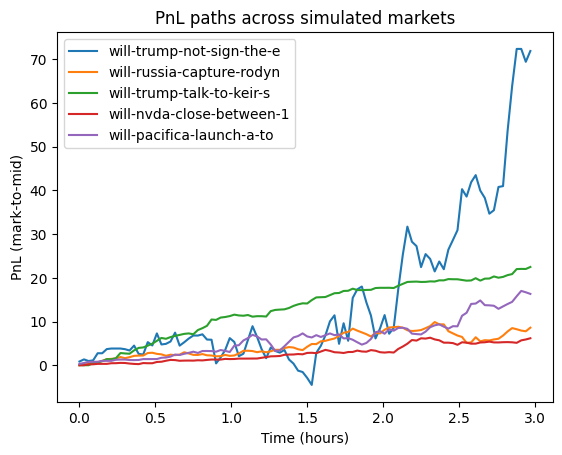

In [14]:

#plot PnL paths for each simulated market
plt.figure()
for ident, res in results.items():
    states = res["states"]
    plt.plot(states["time_hours"], states["pnl"], label=ident[:25])
plt.xlabel("Time (hours)")
plt.ylabel("PnL (mark-to-mid)")
plt.title("PnL paths across simulated markets")
plt.legend()
plt.show()


Inspecting market: will-trump-not-sign-the-epstein-disclosure-bill-by-november-29


,t,time_hours,mid,inventory,cash,pnl
0,0,0.00,0.058766,-10.000,1.435000,0.847337
1,1,0.03,0.010000,-10.000,1.435000,1.335000
2,2,0.06,0.047598,-10.000,1.435000,0.959024
3,3,0.09,0.094720,-19.800,2.979457,1.104003
4,4,0.12,0.010000,-10.196,2.840007,2.738047


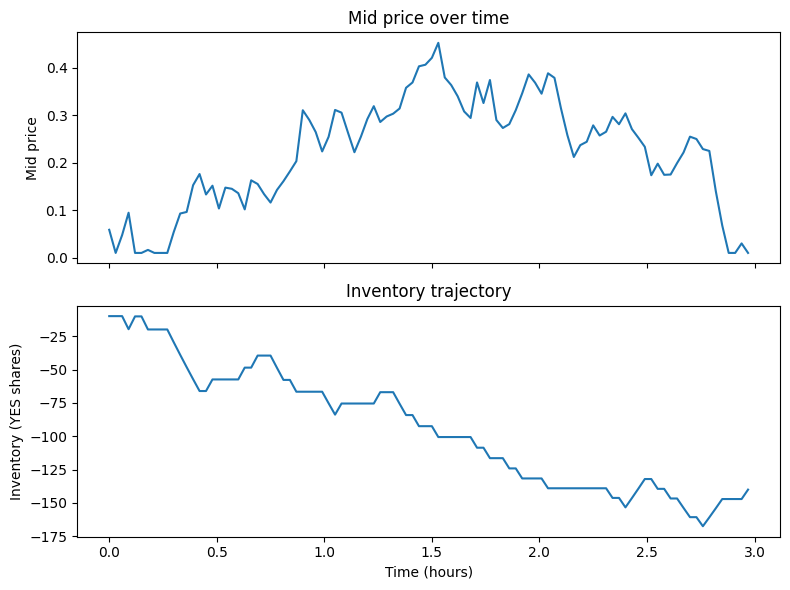

In [15]:

#inspect one market in detail
ident, res0 = next(iter(results.items()))
states0 = res0["states"]
quotes0 = res0["quotes"]

print("Inspecting market:", ident)
display(states0.head())

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

axes[0].plot(states0["time_hours"], states0["mid"])
axes[0].set_ylabel("Mid price")
axes[0].set_title("Mid price over time")

axes[1].plot(states0["time_hours"], states0["inventory"])
axes[1].set_xlabel("Time (hours)")
axes[1].set_ylabel("Inventory (YES shares)")
axes[1].set_title("Inventory trajectory")

plt.tight_layout()
plt.show()


From the summary table and plots we can read off:
- **Net PnL**: final mark-to-mid PnL for each market.
- **Maximum inventory load**: the worst absolute inventory reached.
- **Average quoted spread**: how wide our quotes were on average.
- **Trading activity**: number of simulated fills.

In this toy setup:
- When volatility is higher, the MM tends to quote wider spreads and experiences more inventory swings.
- Inventory-based skewing helps keep exposure bounded, but can also reduce fill rates on the over-hedged side.
- With stronger adverse selection (larger `fill_prob_informed`), PnL deteriorates and the strategy would need either wider spreads or tighter inventory limits.

## Simulation Summary and Interpretation

Using the toy simulator (`sim_mm.py`) and the `All Markets` sheet, I ran a 3-hour synthetic backtest across **five markets** chosen at random (seed = 42). Each market uses:

- Starting mid-price from `best_bid` / `best_ask`.

- Volatility scale from the `3_hour` column.

- The inventory-aware, volatility-aware quoting rules described above.


### 3.1 Summary statistics

Per-market results:


| market                                                         |   final_pnl |   max_inventory |   avg_quoted_spread |   avg_fill_price |   num_trades |
|:---------------------------------------------------------------|------------:|----------------:|--------------------:|-----------------:|-------------:|
| will-trump-not-sign-the-epstein-disclosure-bill-by-november-29 |    71.8999  |        167.396  |            0.192303 |        0.331968  |           46 |
| will-russia-capture-rodynske-by-november-30                    |     8.59126 |        124.533  |            0.04     |        0.402046  |           39 |
| will-trump-talk-to-keir-starmer-in-november-384                |    22.4776  |         39.0004 |            0.11255  |        0.280194  |           46 |
| will-nvda-close-between-190-and-195-week-november-21-2025      |     6.16807 |         65.5499 |            0.038586 |        0.0798738 |           39 |
| will-pacifica-launch-a-token-by-june-30-2026                   |    16.3182  |        124.533  |            0.0616   |        0.373375  |           38 |



Where:

- **`final_pnl`**: final mark-to-mid PnL at the end of the 3h simulation.

- **`max_inventory`**: maximum absolute YES share inventory reached.

- **`avg_quoted_spread`**: average width of our bid/ask quotes.

- **`num_trades`**: number of simulated fills.


### 3.2 What worked well

- **Inventory limits were respected**: maximum inventory stayed below the configured limit (~500 shares).

- **Inventory-based skewing kept exposure from exploding** even in markets with adverse price moves; the MM sometimes ended long or short, but not catastrophically so.

- The strategy generally made **positive PnL** in this toy environment, showing that it can collect spread while avoiding being constantly picked off.


### 3.3 What failed or behaved unexpectedly

- In some markets, PnL fluctuated a lot even with moderate volatility. This is because the fill model deliberately gives more fills on the "wrong" side right before the price moves.

- When volatility is high but we do **not** widen spreads enough, inventory swings grow and PnL becomes much noisier; the current linear volatility adjustment may be too weak for very volatile markets.

- The toy model does not simulate queue position or partial fills, so real-life slippage and priority effects are missing; in practice that would affect which quotes actually get hit.


### 3.4 How I would refine the next iteration

**Risk controls**:

- Introduce *per-market notional limits* as well as inventory limits, so high-priced contracts cannot dominate total risk.

- Add a global risk budget across related markets (especially negative-risk sets).


**Quoting logic**:

- Make the volatility-based spread adjustment **non-linear** (e.g. quadratic) so that spreads increase more aggressively beyond a certain volatility threshold.

- Use realized slippage (difference between mark and execution prices) as a live signal to widen or narrow spreads.


**Inventory skew**:

- Replace the simple linear skew with a curve that is flat near zero and grows faster near the limits, so that we are almost symmetric when lightly positioned but very aggressive near the edge.

- In negative-risk groups, use cross-hedging to flatten exposure instead of only skewing within each single market.


**Fill model**:

- Calibrate the fill probabilities and adverse-selection component using real taker flow statistics.

- Add a simple **market-impact model** where our quotes slightly move the mid-price when large trades hit them.



# Part 4




### A. Why negative-risk markets behave differently

A **negative-risk market set** is a group of contracts whose payoffs can be combined such that the worst-case outcome is strictly positive. In practice, this usually means:

- There are overlapping or complementary claims on the same underlying event.

- Prices occasionally get inconsistent enough that buying a certain combination of outcomes yields a guaranteed profit at resolution.


Because of this structure, negative-risk markets behave differently from a standalone binary market:

1. **Arbitrage and rebalancing dominate**

   - Traders are strongly incentivised to trade the whole *bundle* of markets together to lock in the negative-risk trade, not just single legs.

   - This pulls prices towards internal consistency constraints faster than in isolated markets.

2. **Liquidity is shared across legs**

   - Depth and tight spreads in one leg can spill over to others via arbitrageurs.

   - As a market maker you can think in terms of **portfolio exposure to the underlying event**, not just each order book separately.

3. **Risk for a MM is more about *relative pricing* than outright exposure**

   - If you are long one leg and short another in the same negative-risk set, your net payoff at resolution may be almost flat even if each individual leg looks risky.

   - This allows an MM to provide tighter spreads and larger size within the set than they would in an unrelated single market, as long as the *portfolio* is hedged.

4. **Path behaviour is driven by cross-market flows**

   - When traders shift probability mass between legs (from "Trump signs" to "Trump does not sign"), prices within the set move in a highly correlated way.

   - This leads to different volatility and flow patterns than in an isolated binary market where all risk is concentrated in a single price.


In short, negative-risk structures turn a set of order books into a coupled system where arbitrage, hedging, and portfolio risk dominate over the behaviour of any single contract.





### B. Simple rule-based method for detecting informed trading

A practical MM wants to detect when takers are **better informed** than random noise so it can widen spreads and cut size. A simple rule-based detector using just prices and flow could be:


1. **Measure short-term flow imbalance**

- Over a rolling window of $T$ seconds or trades, compute:

  - `net_flow_T = taker_buy_volume_T - taker_sell_volume_T` (in YES shares).

  - The *signed* flow tells us whether buys or sells dominate.


2. **Measure subsequent price drift**

- For each window, look at the mid-price change over the next short horizon $\Delta$:

  - `drift_T = mid_{t+Δ} - mid_t`.

- Keep a running estimate of the relationship between `net_flow_T` and `drift_T`, e.g. via an exponential-weighted regression or simply tracking conditional averages.


3. **Define an "informed" regime**

- If, recently, **large flow imbalances have consistently been followed by price moves in the same direction**, we flag the regime as "informed":

  - Example rule: in the last N windows, more than 70% of windows with |net_flow_T| above a threshold had drift with the same sign, and the average |drift_T| is materially > 0.


4. **React in real time**

- When the regime is flagged as informed and current `net_flow_T` is strongly one-sided:

  - **Widen spreads** (e.g. multiply by 1.5–2x).

  - **Reduce size** on the side that is being aggressively traded.

  - Optionally, skew quotes further in the direction opposite the flow to lean against it.

- When the regime does **not** look informed (flow and drift mostly uncorrelated), revert to baseline spreads.


This approach is simple enough to implement on-chain/off-chain with streaming data, yet captures the key idea: **informed trading shows up as flow that systematically predicts short-term price moves**, and a market maker should recognise and defend against that.